In [1]:
# Importing all the necessary libraries

import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [2]:
os.chdir('F:\capstone project\data')
os.listdir()

['cleaned_df.csv', 'marketing_campaign.csv']

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Here we have only three columns i.e Education,Marital,Dt_customer which are of object data type all other are numeric

In [5]:
df.shape

(2240, 29)

This data set consistsof 2240 number of rows and 29 columns

To find the number of Unique entries in columns we make use of nunique function

In [6]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Since ID has 2240 unique items so we can say that it is a primary key and many of the 
columns have very less unique items so they basically are categorical variables

Also since Z_CostContact and Z_Revenue both have only single value in all the cell and ID has all different values hence will not contribute in
model building,so its better to remove them from data

In [7]:
df.drop(columns=['ID','Z_Revenue','Z_CostContact'],inplace=True)

Next we will check whether any mssing value present in the data and if yes in which column it is present

In [8]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

there are presence of missing values but only in the income column as people usually prefer to not answer this question

In [9]:
df1=df[df["Income"].isnull()]

In [10]:
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,...,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,...,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,...,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,...,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,...,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,...,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,...,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,...,1,7,6,0,0,0,0,0,0,0


From this we have analyzed that those person whose Income='Null ' are those which have Complain=0 for all and Response =0 
so we can filter the data accordingly and fill the median value of that data inspite of comlete data to the missing values 
in income

In [11]:
df2=df[df['Complain']==0]
df3=df2[df2['Response']==0]

In [12]:
df3['Income'].median()

50272.0

In [13]:
df['Income']=np.where(df["Income"].isnull(),df3['Income'].median(),df["Income"])

In [14]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

Hence the missing values are Treated

In [15]:
# Univariate analysis

#1.Education

df['Education'].value_counts()


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
# there are two categories like 2n Cycle and Basic ,i combined buth two as Under Graduate
df['Education']=df['Education'].replace(['2n Cycle','Basic'],'Under Graduate')

In [17]:
#2 Marital_Status

df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [18]:

df['Marital_Status']=df['Marital_Status'].replace(['Widow','Alone','Yolo','Absurd'],'Miscellenious')

In [19]:
#3 Dt_customer

df['Dt_Customer'].value_counts()

31-08-2012    12
14-02-2013    11
12-09-2012    11
12-05-2014    11
22-05-2014    10
              ..
29-01-2014     1
14-08-2013     1
13-09-2013     1
26-04-2014     1
08-02-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

as this a Date column so i preferrable should not do any changes in this column

In [20]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [22]:
df['Dt_year'] =pd.DatetimeIndex(df['Dt_Customer']).year
df['Dt_month'] = pd.DatetimeIndex(df['Dt_Customer']).month
df['Dt_day'] = pd.DatetimeIndex(df['Dt_Customer']).day

In [23]:
df['Dt_day']

0        9
1        3
2       21
3        2
4       19
        ..
2235    13
2236     6
2237    25
2238    24
2239    15
Name: Dt_day, Length: 2240, dtype: int64

In [24]:
import calendar

In [25]:
df['Dt_month'] = df['Dt_month'].apply(lambda x : calendar.month_abbr[x])

Feature Engineering

In [26]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Dt_year', 'Dt_month',
       'Dt_day'],
      dtype='object')

In [27]:
df['Year_Birth'].head()

0    1957
1    1954
2    1965
3    1984
4    1981
Name: Year_Birth, dtype: int64

## Feature Engineering


To Find the current Age of Customer we subtract the Year_Birth from 2021

In [28]:
df['Age'] = 2021-df['Year_Birth']

In [29]:
df['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [30]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Dt_year', 'Dt_month', 'Dt_day',
       'Age'],
      dtype='object')

In [31]:
df['Total_expences'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntGoldProds']+df['MntSweetProducts']

In [32]:
df['Total_expences'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_expences, dtype: int64

In [33]:
df['Total_Purchase'] =df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [34]:
df['Total_Purchase'].head()

0    25
1     6
2    21
3     8
4    19
Name: Total_Purchase, dtype: int64

In [35]:
corr=df.corr()

In [36]:
corr

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_day,Age,Total_expences,Total_Purchase
Year_Birth,1.000000,-0.160842,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,0.007123,-0.005930,-0.006539,-0.030128,0.021325,-0.028188,-0.001520,-1.000000,-0.111306,-0.168304
Income,-0.160842,1.000000,-0.425511,0.018898,-0.004207,0.577038,0.428839,0.577799,0.437642,0.436083,...,0.334941,0.274846,0.087634,-0.027140,0.133007,0.022400,-0.031150,0.160842,0.664850,0.563543
Kidhome,0.230176,-0.425511,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,0.053339,-0.010121,-0.230176,-0.556669,-0.477895
Teenhome,-0.352111,0.018898,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,-0.008260,-0.001597,0.352111,-0.138384,0.133163
Recency,-0.019871,-0.004207,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,0.000129,-0.019283,-0.001781,0.013231,-0.198437,-0.026084,0.018702,0.019871,0.020433,0.005740
MntWines,-0.157773,0.577038,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,0.472613,0.354133,0.205907,-0.039007,0.247254,-0.154188,0.002036,0.157773,0.891839,0.712789
MntFruits,-0.017917,0.428839,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,0.215833,0.194748,-0.009773,-0.005166,0.125289,-0.055150,-0.020009,0.017917,0.614229,0.455461
MntMeatProducts,-0.030872,0.577799,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,0.373769,0.309761,0.043033,-0.023483,0.236335,-0.082472,-0.019410,0.030872,0.842965,0.554229
MntFishProducts,-0.041625,0.437642,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,0.199578,0.260762,0.002577,-0.020953,0.111331,-0.067611,-0.012385,0.041625,0.642818,0.469454
MntSweetProducts,-0.018133,0.436083,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,0.259590,0.241818,0.009985,-0.022485,0.117372,-0.073366,0.005675,0.018133,0.603016,0.472876


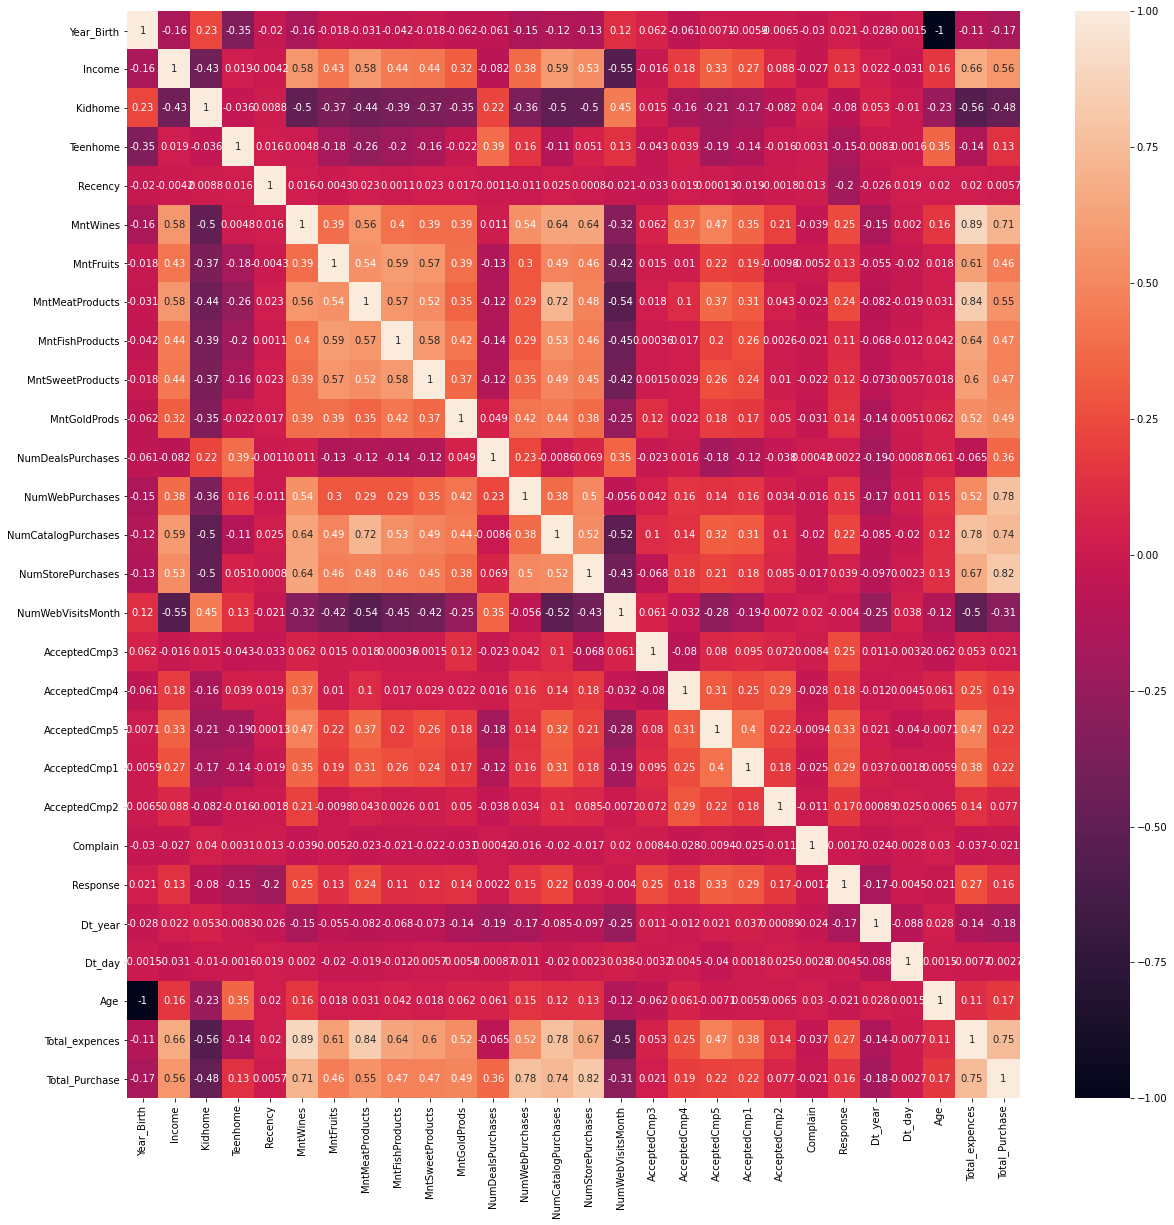

In [37]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [38]:
df.shape

(2240, 32)

In [39]:
# Checking for correlation by unstacking data and get the values between range[33:60] since we have 33 columns so first 
#33 values will be 1 only
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[33:55]

Total_expences       MntMeatProducts        0.842965
Total_Purchase       NumStorePurchases      0.820259
NumStorePurchases    Total_Purchase         0.820259
Total_expences       NumCatalogPurchases    0.778577
NumCatalogPurchases  Total_expences         0.778577
NumWebPurchases      Total_Purchase         0.777831
Total_Purchase       NumWebPurchases        0.777831
Total_expences       Total_Purchase         0.753903
Total_Purchase       Total_expences         0.753903
                     NumCatalogPurchases    0.735198
NumCatalogPurchases  Total_Purchase         0.735198
MntMeatProducts      NumCatalogPurchases    0.723827
NumCatalogPurchases  MntMeatProducts        0.723827
Total_Purchase       MntWines               0.712789
MntWines             Total_Purchase         0.712789
Total_expences       NumStorePurchases      0.674669
NumStorePurchases    Total_expences         0.674669
Total_expences       Income                 0.664850
Income               Total_expences         0.

In [40]:
high_correlated_feature=[['MntWines','MntMeatProducts','NumStorePurchases','NumCatalogPurchases','NumWebPurchases']]

In [41]:
df.drop(columns=['MntWines','MntMeatProducts','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','Total_Purchase'],inplace=True)

In [42]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Dt_year',
       'Dt_month', 'Dt_day', 'Age', 'Total_expences'],
      dtype='object')

In [43]:
corr=df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[23:55]

Age                Year_Birth           1.000000
Income             Total_expences       0.664850
Total_expences     Income               0.664850
MntFishProducts    Total_expences       0.642818
Total_expences     MntFishProducts      0.642818
                   MntFruits            0.614229
MntFruits          Total_expences       0.614229
Total_expences     MntSweetProducts     0.603016
MntSweetProducts   Total_expences       0.603016
MntFruits          MntFishProducts      0.594804
MntFishProducts    MntFruits            0.594804
                   MntSweetProducts     0.579870
MntSweetProducts   MntFishProducts      0.579870
MntFruits          MntSweetProducts     0.567164
MntSweetProducts   MntFruits            0.567164
Total_expences     Kidhome              0.556669
Kidhome            Total_expences       0.556669
NumWebVisitsMonth  Income               0.549725
Income             NumWebVisitsMonth    0.549725
Total_expences     MntGoldProds         0.524262
MntGoldProds       T

In [44]:
df.to_csv('cleaned_df.csv')

In [45]:
df['Education'].value_counts()

Graduation        1127
PhD                486
Master             370
Under Graduate     257
Name: Education, dtype: int64

In [46]:
le=LabelEncoder()

In [47]:
df['Education']=le.fit_transform(df['Education'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Dt_month']=le.fit_transform(df["Dt_month"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year_Birth         2240 non-null   int64         
 1   Education          2240 non-null   int32         
 2   Marital_Status     2240 non-null   int32         
 3   Income             2240 non-null   float64       
 4   Kidhome            2240 non-null   int64         
 5   Teenhome           2240 non-null   int64         
 6   Dt_Customer        2240 non-null   datetime64[ns]
 7   Recency            2240 non-null   int64         
 8   MntFruits          2240 non-null   int64         
 9   MntFishProducts    2240 non-null   int64         
 10  MntSweetProducts   2240 non-null   int64         
 11  MntGoldProds       2240 non-null   int64         
 12  NumDealsPurchases  2240 non-null   int64         
 13  NumWebVisitsMonth  2240 non-null   int64         
 14  Accepted

In [49]:
df.drop(columns=['Dt_Customer'],inplace=True)

In [50]:
# Scale the data and normalize
sc = StandardScaler()

In [51]:
df_scaled=sc.fit_transform(df)

In [52]:
df_scaled

array([[-0.98534473, -0.86992964,  0.60105728, ..., -0.74558814,
         0.98534473,  1.67941681],
       [-1.23573295, -0.86992964,  0.60105728, ..., -1.42486583,
         1.23573295, -0.96127545],
       [-0.3176428 , -0.86992964,  1.30156109, ...,  0.61296725,
         0.3176428 ,  0.28267329],
       ...,
       [ 1.01776106, -0.86992964, -1.50045413, ...,  1.06581905,
        -1.01776106,  1.05495122],
       [-1.06880747,  0.05228635,  1.30156109, ...,  0.9526061 ,
         1.06880747,  0.39394775],
       [-1.23573295,  0.97450235, -0.79995033, ..., -0.06631044,
         1.23573295, -0.7204576 ]])

In [53]:
scaled_data = StandardScaler().fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

In [54]:
scaled_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_month,Dt_day,Age,Total_expences
0,-0.985345,-0.869930,0.601057,0.236164,-0.825218,-0.929894,0.307039,1.551577,2.462147,1.476500,...,-0.28014,-0.262111,-0.11651,-0.097282,2.388846,-1.502225,-1.563693,-0.745588,0.985345,1.679417
1,-1.235733,-0.869930,0.601057,-0.234973,1.032559,0.906934,-0.383664,-0.636301,-0.650449,-0.631503,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-1.276494,-1.424866,1.235733,-0.961275
2,-0.317643,-0.869930,1.301561,0.774453,-0.825218,-0.929894,-0.798086,0.570804,1.345274,-0.146905,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.041094,-1.276494,0.612967,0.317643,0.282673
3,1.268149,-0.869930,1.301561,-1.021853,1.032559,-0.929894,-0.798086,-0.560857,-0.503974,-0.583043,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,1.308291,-1.538079,-1.268149,-0.918094
4,1.017761,0.974502,-0.799950,0.242356,1.032559,-0.929894,1.550305,0.419916,0.155164,-0.001525,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-0.414899,0.386541,-1.017761,-0.305254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.869930,-0.799950,0.359402,-0.825218,0.906934,-0.107383,0.419916,0.081926,2.203398,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.041094,0.159498,-0.292736,0.150717,1.221032
2236,-1.903435,0.974502,1.301561,0.470894,2.890335,0.906934,0.237969,-0.661449,-0.687068,-0.655733,...,-0.28014,3.815174,-0.11651,-0.097282,-0.418612,1.420036,1.308291,-1.085227,1.903435,-0.268717
2237,1.017761,-0.869930,-1.500454,0.189945,-0.825218,-0.929894,1.446700,0.545656,-0.101168,-0.364974,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-0.414899,1.065819,-1.017761,1.054951
2238,-1.068807,0.052286,1.301561,0.679858,-0.825218,0.906934,-1.419719,0.092992,0.777683,0.071165,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-0.414899,0.952606,1.068807,0.393948


In [55]:

pca = PCA(n_components=3)
df_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']


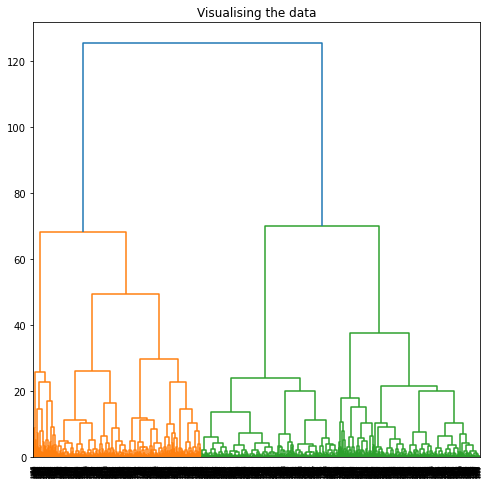

In [56]:
# Create the Dendogram plot
#
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

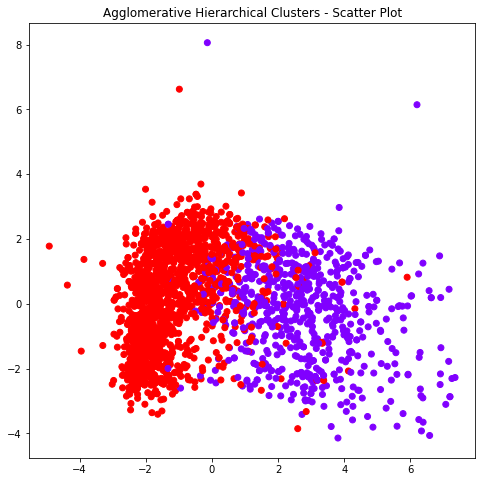

In [57]:
# Create the clusters using Agglomerative hierarchical clustering
for i in range (1,4):
    agc = AgglomerativeClustering(n_clusters = 2)
    plt.figure(figsize =(8, 8))
    
plt.scatter(df_pca['P1'],df_pca['P2'], c = agc.fit_predict(scaled_df), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot")
plt.show()


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

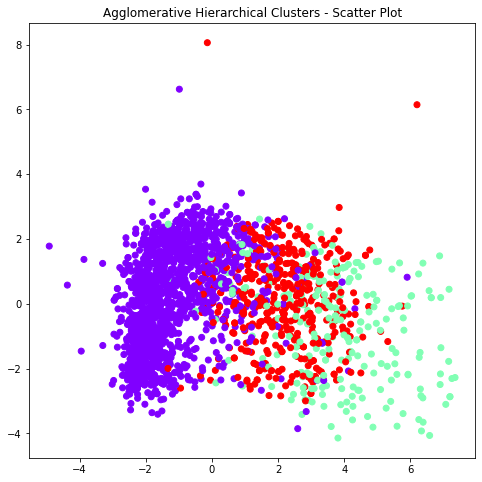

In [58]:
# Create the clusters using Agglomerative hierarchical clustering
for i in range (1,4):
    agc = AgglomerativeClustering(n_clusters = 3)
    plt.figure(figsize =(8, 8))
    
plt.scatter(df_pca['P1'],df_pca['P2'], c = agc.fit_predict(scaled_df), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot")
plt.show()


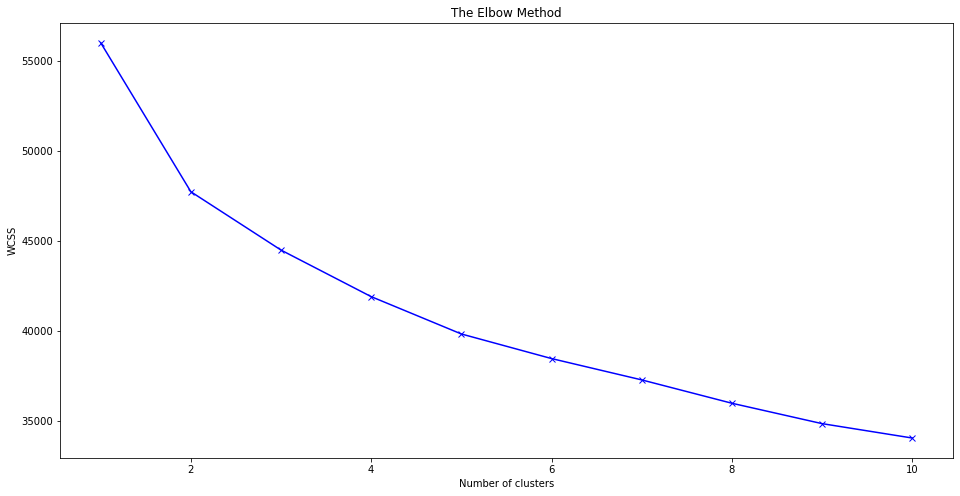

In [59]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

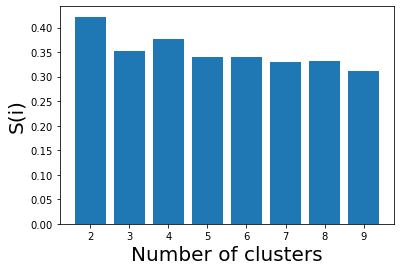

In [60]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=0)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [61]:

kmeans=KMeans(n_clusters=2, random_state=42).fit(df_pca)
pred=kmeans.predict(df_pca)


# Appending those cluster value into main dataframe (without standard-scalar)
df1=df.copy()
df1['cluster'] = pred + 1


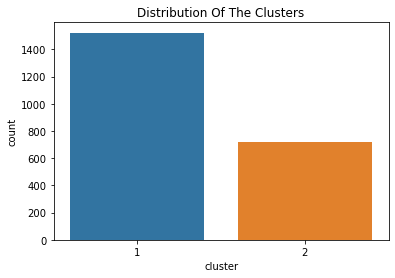

In [62]:
pl = sns.countplot(x=df1["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [63]:
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_month,Dt_day,Age,Total_expences,cluster
0,1957,0,3,58138.0,0,0,58,88,172,88,...,0,0,0,1,2012,0,9,64,1617,2
1,1954,0,3,46344.0,1,1,38,1,2,1,...,0,0,0,0,2014,1,3,67,27,1
2,1965,0,4,71613.0,0,0,26,49,111,21,...,0,0,0,0,2013,1,21,56,776,2
3,1984,0,4,26646.0,1,0,26,4,10,3,...,0,0,0,0,2014,10,2,37,53,1
4,1981,2,1,58293.0,1,0,94,43,46,27,...,0,0,0,0,2014,4,19,40,422,1


In [64]:
df_cluster1=df1.loc[df1['cluster']==1]

In [65]:
df_cluster1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_month,Dt_day,Age,Total_expences,cluster
1,1954,0,3,46344.0,1,1,38,1,2,1,...,0,0,0,0,2014,1,3,67,27,1
3,1984,0,4,26646.0,1,0,26,4,10,3,...,0,0,0,0,2014,10,2,37,53,1
4,1981,2,1,58293.0,1,0,94,43,46,27,...,0,0,0,0,2014,4,19,40,422,1
5,1967,1,4,62513.0,0,1,16,42,0,42,...,0,0,0,0,2013,11,9,54,716,1
6,1971,0,0,55635.0,0,1,34,65,50,49,...,0,0,0,0,2012,9,13,50,590,1


In [66]:
df_cluster2=df1.loc[df1['cluster']==2]

Next analysis we decide to do it for Income to check the impact of expenditure through different means on Income

In [67]:
df_reg = df.copy()

In [68]:
df_reg.drop(columns=['Income'],inplace=True)

In [69]:
df_reg.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_month,Dt_day,Age,Total_expences
0,1957,0,3,0,0,58,88,172,88,88,...,0,0,0,0,1,2012,0,9,64,1617
1,1954,0,3,1,1,38,1,2,1,6,...,0,0,0,0,0,2014,1,3,67,27
2,1965,0,4,0,0,26,49,111,21,42,...,0,0,0,0,0,2013,1,21,56,776
3,1984,0,4,1,0,26,4,10,3,5,...,0,0,0,0,0,2014,10,2,37,53
4,1981,2,1,1,0,94,43,46,27,15,...,0,0,0,0,0,2014,4,19,40,422


In [70]:
df_reg_scaled=sc.fit_transform(df_reg)

In [71]:
scaled_reg_df= pd.DataFrame(df_reg_scaled, index=df_reg.index, columns=df_reg.columns)

In [72]:
scaled_reg_df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_month,Dt_day,Age,Total_expences
0,-0.985345,-0.869930,0.601057,-0.825218,-0.929894,0.307039,1.551577,2.462147,1.476500,0.843207,...,-0.28014,-0.262111,-0.11651,-0.097282,2.388846,-1.502225,-1.563693,-0.745588,0.985345,1.679417
1,-1.235733,-0.869930,0.601057,1.032559,0.906934,-0.383664,-0.636301,-0.650449,-0.631503,-0.729006,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-1.276494,-1.424866,1.235733,-0.961275
2,-0.317643,-0.869930,1.301561,-0.825218,-0.929894,-0.798086,0.570804,1.345274,-0.146905,-0.038766,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.041094,-1.276494,0.612967,0.317643,0.282673
3,1.268149,-0.869930,1.301561,1.032559,-0.929894,-0.798086,-0.560857,-0.503974,-0.583043,-0.748179,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,1.308291,-1.538079,-1.268149,-0.918094
4,1.017761,0.974502,-0.799950,1.032559,-0.929894,1.550305,0.419916,0.155164,-0.001525,-0.556446,...,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-0.414899,0.386541,-1.017761,-0.305254


In [73]:
scaled_reg_df['Income']=df['Income']

Decision Tree Regressor

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x=scaled_reg_df.drop(columns=['Income'])
y=scaled_reg_df['Income']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [79]:

print("Train accuracy:", dt.score(x_train,y_train))

print("Test accuracy:", dt.score(x_test,y_test))

Train accuracy: 0.9997305449505766
Test accuracy: 0.7515982661101062


In [80]:
?DecisionTreeRegressor

In [81]:

from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10]
     
             }

tr = DecisionTreeRegressor()
gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(x_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [82]:
gsearch.best_params_

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [83]:
dt2=DecisionTreeRegressor(max_depth= 12, min_samples_leaf= 10, min_samples_split=3)
dt2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=3)

In [84]:
 print("Train accuracy:", dt2.score(x_train,y_train))

print("Test accuracy:", dt2.score(x_test,y_test))

Train accuracy: 0.5689509837374063
Test accuracy: 0.6271797731717126


In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [86]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
print('Train accuracy',rf.score(x_train,y_train))
print("Test accuracy:", rf.score(x_test,y_test))

Train accuracy 0.9274720981132815
Test accuracy: 0.5565350687453382


In [88]:
?RandomForestRegressor

In [89]:

parameters = {'n_estimators':[50,100,150],
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10],
            'max_features':['auto','sqrt','log2']
             }

rf = RandomForestRegressor()
gsearch2 = GridSearchCV(rf, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch2.fit(x_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [90]:
gsearch2.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 100}

In [91]:
rf2=RandomForestRegressor(max_depth= 12, min_samples_leaf= 3, min_samples_split=5,n_estimators=150,max_features='auto')
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=150)

In [92]:
print('Train accuracy',rf2.score(x_train,y_train))
print("Test accuracy:", rf2.score(x_test,y_test))

Train accuracy 0.7266128523328983
Test accuracy: 0.7469463732261632


In [93]:
pred_y_trn=rf2.predict(x_train)

In [94]:
pred_y_test=rf2.predict(x_test)

In [95]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred_y_trn))  
print('Mean Absolute Percentage Error:', np.mean(np.abs(((pred_y_trn-y_train)/y_train)*100)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred_y_trn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_y_trn)))

Mean Absolute Error: 3905.8734015484088
Mean Absolute Percentage Error: 12.520031576315588
Mean Squared Error: 186682385.86025795
Root Mean Squared Error: 13663.176272750708


In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y_test))  
print('Mean Absolute Percentage Error:', np.mean(np.abs(((pred_y_test-y_test)/y_test)*100)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_test)))

Mean Absolute Error: 6812.163809160716
Mean Absolute Percentage Error: 27.251326369334496
Mean Squared Error: 115233238.02190746
Root Mean Squared Error: 10734.674565253828


In [97]:
import lightgbm as lgb

In [98]:
lgbm_model=lgb.LGBMRegressor()

In [99]:
lgbm_model.fit(x_train,y_train)

LGBMRegressor()

In [100]:
print('Train accuracy',lgbm_model.score(x_train,y_train))
print("Test accuracy:", lgbm_model.score(x_test,y_test))

Train accuracy 0.817676213851056
Test accuracy: 0.755306209552938


In [101]:
?lgb.LGBMRegressor

In [102]:

parameters = {'n_estimators':[50,100,150],
              'max_depth':[2,6,8,10,12],
              "boosting_type":['rf','gbdt'],
            'learning_rate':[0.01,.001,.0001]
             }

lgbm = lgb.LGBMRegressor()
gsearch3 = GridSearchCV(lgbm, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch3.fit(x_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['rf', 'gbdt'],
                         'learning_rate': [0.01, 0.001, 0.0001],
                         'max_depth': [2, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [103]:
gsearch3.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.01,
 'max_depth': 12,
 'n_estimators': 150}

In [104]:
lgbm_model2=lgb.LGBMRegressor(boosting_type='gbdt',learning_rate=0.1,max_depth=8,n_estimators=80)

In [105]:
lgbm_model2.fit(x_train,y_train)

LGBMRegressor(max_depth=8, n_estimators=80)

In [106]:
print('Train accuracy',lgbm_model2.score(x_train,y_train))
print("Test accuracy:", lgbm_model2.score(x_test,y_test))

Train accuracy 0.7804394045358937
Test accuracy: 0.7752969496944222


In [107]:
pred_y_lgbm=lgbm_model2.predict(x_test)

In [108]:
from sklearn import metrics

In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y_lgbm))  
print('Mean Absolute Percentage Error:', np.mean(np.abs(((pred_y_lgbm-y_test)/y_test)*100)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y_lgbm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_lgbm)))

Mean Absolute Error: 7030.873447315789
Mean Absolute Percentage Error: 24.097385589061762
Mean Squared Error: 102323212.7127466
Root Mean Squared Error: 10115.493695947154


In [110]:

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_year,Dt_month,Dt_day,Age,Total_expences
0,1957,0,3,58138.0,0,0,58,88,172,88,...,0,0,0,0,1,2012,0,9,64,1617
1,1954,0,3,46344.0,1,1,38,1,2,1,...,0,0,0,0,0,2014,1,3,67,27
2,1965,0,4,71613.0,0,0,26,49,111,21,...,0,0,0,0,0,2013,1,21,56,776
3,1984,0,4,26646.0,1,0,26,4,10,3,...,0,0,0,0,0,2014,10,2,37,53
4,1981,2,1,58293.0,1,0,94,43,46,27,...,0,0,0,0,0,2014,4,19,40,422


In [111]:
df_class=df.copy()

In [112]:
df_class.drop(columns=['Response','Year_Birth','Dt_year'],inplace=True)

In [113]:
df_class_scld=sc.fit_transform(df_class)

In [114]:
df_class_scld=pd.DataFrame(df_class_scld)

In [115]:
df_class_scld['Response']=df['Response']

In [116]:
class_corr=df_class.corr()

In [117]:

c2 = class_corr.abs().unstack()
c2.sort_values(ascending = False)[21:55]

Education          Education            1.000000
Income             Total_expences       0.664850
Total_expences     Income               0.664850
                   MntFishProducts      0.642818
MntFishProducts    Total_expences       0.642818
MntFruits          Total_expences       0.614229
Total_expences     MntFruits            0.614229
MntSweetProducts   Total_expences       0.603016
Total_expences     MntSweetProducts     0.603016
MntFruits          MntFishProducts      0.594804
MntFishProducts    MntFruits            0.594804
MntSweetProducts   MntFishProducts      0.579870
MntFishProducts    MntSweetProducts     0.579870
MntSweetProducts   MntFruits            0.567164
MntFruits          MntSweetProducts     0.567164
Total_expences     Kidhome              0.556669
Kidhome            Total_expences       0.556669
Income             NumWebVisitsMonth    0.549725
NumWebVisitsMonth  Income               0.549725
Total_expences     MntGoldProds         0.524262
MntGoldProds       T

In [118]:
x=df_class_scld.drop(columns=['Response'])
y=df_class_scld['Response']

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf_class=RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=3,max_depth=7)

In [122]:
model_class=rf_class.fit(x_train,y_train)

In [123]:
print('Train Accuracy',model_class.score(x_train,y_train))
print('Test Accuracy',model_class.score(x_test,y_test))


Train Accuracy 0.9084821428571429
Test Accuracy 0.8772321428571429


In [124]:
pred_train_rf=rf_class.predict(x_train)
pred_test_rf=rf_class.predict(x_test)

In [125]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1524
           1       0.99      0.39      0.56       268

    accuracy                           0.91      1792
   macro avg       0.95      0.70      0.76      1792
weighted avg       0.92      0.91      0.89      1792



In [126]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       382
           1       0.76      0.24      0.37        66

    accuracy                           0.88       448
   macro avg       0.82      0.61      0.65       448
weighted avg       0.87      0.88      0.85       448



Because of the high imbalance in the classes their is large difference in recall and precision to make balance
between the classes we make use of smote technique

In [127]:
import imblearn

In [128]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 268
Before OverSampling, counts of label '0': 1524
After OverSampling, counts of label '1': 1524
After OverSampling, counts of label '0': 1524


In [129]:
model_smote=rf_class.fit(x_train_res,y_train_res)

In [130]:
print('Train Accuracy',model_smote.score(x_train_res,y_train_res))
print('Train Accuracy',model_smote.score(x_test,y_test))


Train Accuracy 0.9402887139107612
Train Accuracy 0.859375


In [131]:

parameters = {'n_estimators':[50,100,150],
              'min_samples_split':[3,4,5], 
              'max_depth':[2,4,6,8,9,10],
              "min_samples_leaf":[2,5,10],
             }

rf_class = RandomForestClassifier()
gsearch2 = GridSearchCV(rf_class, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch2.fit(x_train_res, y_train_res)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 9, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [132]:
gsearch2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [133]:
rf_smote=RandomForestClassifier(n_estimators=150,min_samples_split=3,min_samples_leaf=2,max_depth=5)

In [134]:
rf_smote.fit(x_train_res,y_train_res)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=150)

In [135]:
print('Train accuracy',rf_smote.score(x_train_res,y_train_res))
print("Test accuracy:", rf_smote.score(x_test,y_test))

Train accuracy 0.8927165354330708
Test accuracy: 0.8415178571428571


In [136]:
pred_train_rf_smt=rf_smote.predict(x_train_res)
pred_test_rf_smt=rf_smote.predict(x_test)

In [137]:
print(metrics.classification_report(y_train_res, pred_train_rf_smt))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1524
           1       0.91      0.87      0.89      1524

    accuracy                           0.89      3048
   macro avg       0.89      0.89      0.89      3048
weighted avg       0.89      0.89      0.89      3048



In [138]:
print(metrics.classification_report(y_test, pred_test_rf_smt))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       382
           1       0.47      0.59      0.52        66

    accuracy                           0.84       448
   macro avg       0.70      0.74      0.71       448
weighted avg       0.86      0.84      0.85       448



lightgbm classifier

In [139]:

parameters = {'n_estimators':[50,100,150],
              'max_depth':[2,6,8,10,12],
              "boosting_type":['rf','gbdt'],
            'learning_rate':[0.01,.001,.0001]
             }

lgbm_smote = lgb.LGBMClassifier()
gsearch3 = GridSearchCV(lgbm_smote, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch3.fit(x_train_res, y_train_res)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['rf', 'gbdt'],
                         'learning_rate': [0.01, 0.001, 0.0001],
                         'max_depth': [2, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [140]:
gsearch3.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.01,
 'max_depth': 12,
 'n_estimators': 150}

In [141]:
lgbm_smt=lgb.LGBMClassifier(n_estimators=100,boosting_type='gbdt',learning_rate=0.001,max_depth=7)

In [142]:
lgbm_smt.fit(x_train_res,y_train_res)

LGBMClassifier(learning_rate=0.001, max_depth=7)

In [143]:
print('Train accuracy',lgbm_smt.score(x_train_res,y_train_res))
print("Test accuracy:", lgbm_smt.score(x_test,y_test))

Train accuracy 0.8471128608923885
Test accuracy: 0.8236607142857143


In [144]:
pred_train_lgbm_smt=lgbm_smt.predict(x_train_res)
pred_test_lgbm_smt=lgbm_smt.predict(x_test)

In [145]:
print(metrics.classification_report(y_train_res, pred_train_lgbm_smt))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1524
           1       0.88      0.81      0.84      1524

    accuracy                           0.85      3048
   macro avg       0.85      0.85      0.85      3048
weighted avg       0.85      0.85      0.85      3048



In [146]:
print(metrics.classification_report(y_test, pred_test_lgbm_smt))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       382
           1       0.43      0.56      0.48        66

    accuracy                           0.82       448
   macro avg       0.67      0.71      0.69       448
weighted avg       0.85      0.82      0.83       448

